In [ ]:
import pandas as pd
import numpy as np
import pickle as pickle
import os
import time
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import math
import scipy.interpolate

from pathlib import Path
cwd = os.getcwd()
parent = Path(cwd).parent

In [107]:
data = pd.read_csv("data/dwt/32chan_timefreq_1s-1.0step.csv")
data =  data[data['Sub'].isin([1])].reset_index(drop=True)
data = data.drop(['Sub','Trial','Valence','Arousal','Emotion'],axis=1)
data.head(2)

,0_theta_entropy,0_theta_energy,0_alpha_entropy,0_alpha_energy,0_beta_entropy,0_beta_energy,0_gamma_entropy,0_gamma_energy,1_theta_entropy,1_theta_energy,...,30_gamma_entropy,30_gamma_energy,31_theta_entropy,31_theta_energy,31_alpha_entropy,31_alpha_energy,31_beta_entropy,31_beta_energy,31_gamma_entropy,31_gamma_energy
0,134.896311,123.796220,1108.943509,423.093365,4780.592817,1133.165852,1907.700616,472.320268,24.000269,86.651690,...,2775.159569,681.370575,2.597131,59.038866,1517.462531,513.044844,4551.429278,1082.407053,2285.823519,565.200991
1,51.564742,93.563267,3744.421694,894.933251,7050.714302,1473.591381,1055.592779,371.980649,81.716264,117.419598,...,844.294841,352.742085,-30.647820,44.418508,1891.147337,591.544468,4002.784442,979.050943,364.877712,204.618409


In [67]:
locs = "data_2D[0] = (0,        0,          0,          data[0],    0,          data[16],   0,          0,          0       )\n\
data_2D[1] = (0,        0,          0,          data[1],    0,          data[17],   0,          0,          0       )\n\
data_2D[2] = (data[3],  0,          data[2],    0,          data[18],   0,          data[19],   0,          data[20])\n\
data_2D[3] = (0,        data[4],    0,          data[5],    0,          data[22],   0,          data[21],   0       )\n\
data_2D[4] = (data[7],  0,          data[6],    0,          data[23],   0,          data[24],   0,          data[25])\n\
data_2D[5] = (0,        data[8],    0,          data[9],    0,          data[27],   0,          data[26],   0       )\n\
data_2D[6] = (data[11], 0,          data[10],   0,          data[15],   0,          data[28],   0,          data[29])\n\
data_2D[7] = (0,        0,          0,          data[12],   0,          data[30],   0,          0,          0       )\n\
data_2D[8] = (0,        0,          0,          data[13],   data[14],   data[31],   0,          0,          0       )"

locs = locs.split("\n")
#print(locs)

x = []
y = []

for chan in range(0,32):
    #getting row
    for i in range(0,len(locs)):
        if f"data[{chan}]" in locs[i]:
            y.append(i)
            break
    #getting col
    for i in range(0,len(locs)):
        if f"data[{chan}]" in locs[i]:
            temp = locs[i].split(",")
            for t in range(0,len(temp)):
                if f"data[{chan}]" in temp[t]:
                    x.append(t)
                    break
                    
coords = list(zip(x,y))
print(coords)

[(3, 0), (3, 1), (2, 2), (0, 2), (1, 3), (3, 3), (2, 4), (0, 4), (1, 5), (3, 5), (2, 6), (0, 6), (3, 7), (3, 8), (4, 8), (4, 6), (5, 0), (5, 1), (4, 2), (6, 2), (8, 2), (7, 3), (5, 3), (4, 4), (6, 4), (8, 4), (7, 5), (5, 5), (6, 6), (8, 6), (5, 7), (5, 8)]


In [192]:
def generate_plot(ax, arr, ch, band):
    #coords = [(3, 0), (3, 1), (2, 2), (0, 2), (1, 3), (3, 3), (2, 4), (0, 4), (1, 5), (3, 5), (2, 6), (0, 6), (3, 7), (3, 8), (4, 8), (4, 6), (5, 0), (5, 1), (4, 2), (6, 2), (8, 2), (7, 3), (5, 3), (4, 4), (6, 4), (8, 4), (7, 5), (5, 5), (6, 6), (8, 6), (5, 7), (5, 8)]
    z = arr

    xi = np.linspace(0, 8, N)
    yi = np.linspace(0, 8, N)
    zi = scipy.interpolate.griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')

    dr = xi[1] - xi[0]
    for i in range(N):
        for j in range(N):
            r = np.sqrt((xi[i] - xy_center[0])**2 + (yi[j] - xy_center[1])**2)
            if (r - dr/2) > radius:
                zi[j,i] = "nan"

    #fig = plt.figure()
    # set aspect = 1 to make it a circle
    #ax = fig.add_subplot(111, aspect = 1)
    ax.set_aspect('equal')

    # use different number of levels for the fill and the lines
    CS = ax.contourf(xi, yi, zi, 60, cmap = plt.cm.jet, zorder = 1)
    ax.contour(xi, yi, zi, 5, colors = "grey", zorder = 2)

    ax.scatter(x, y, marker = '.', c = 'k', s = 10, zorder = 3)
    
    if ch == 1:
        refx = 3
        refy = 1
    if ch == 7:
        refx = 0
        refy = 4
    if ch == 15:
        refx = 4
        refy = 6
    if ch == 17:
        refx = 5
        refy = 1
    if ch == 25:
        refx = 8
        refy = 4
        
    
    ax.scatter(refx, refy, marker = '+', c = 'w', s = 40, zorder = 3)    
        

    circle = matplotlib.patches.Circle(xy = xy_center, radius = radius, edgecolor = "k", facecolor = "none")
    ax.add_patch(circle)

    for loc, spine in ax.spines.items():
        spine.set_linewidth(0)

    ax.set_xticks([])
    ax.set_yticks([])

    circle = matplotlib.patches.Ellipse(xy = [0,4], width = 0.5, height = 1.0, angle = 0, edgecolor = "k", facecolor = "w", zorder = 0)
    ax.add_patch(circle)
    circle = matplotlib.patches.Ellipse(xy = [8,4], width = 0.5, height = 1.0, angle = 0, edgecolor = "k", facecolor = "w", zorder = 0)
    ax.add_patch(circle)
    xy = [[1.5,3], [2,4.5],[2.5,3]]
    polygon = matplotlib.patches.Polygon(xy = xy, facecolor = "w", zorder = 0, edgecolor = "k")
    ax.add_patch(polygon) 

    ax.set_xlim(0, 8)
    ax.set_ylim(0, 8)
    ax.invert_yaxis()
        
#     ax = plt.gca()
#     ax.set_ylim(ax.get_ylim()[::-1])

#     fig.set_figheight(10)
#     fig.set_figwidth(10)
    #plt.show()
    #plt.savefig(f'{ch}_{band}.png')
    return fig
    

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


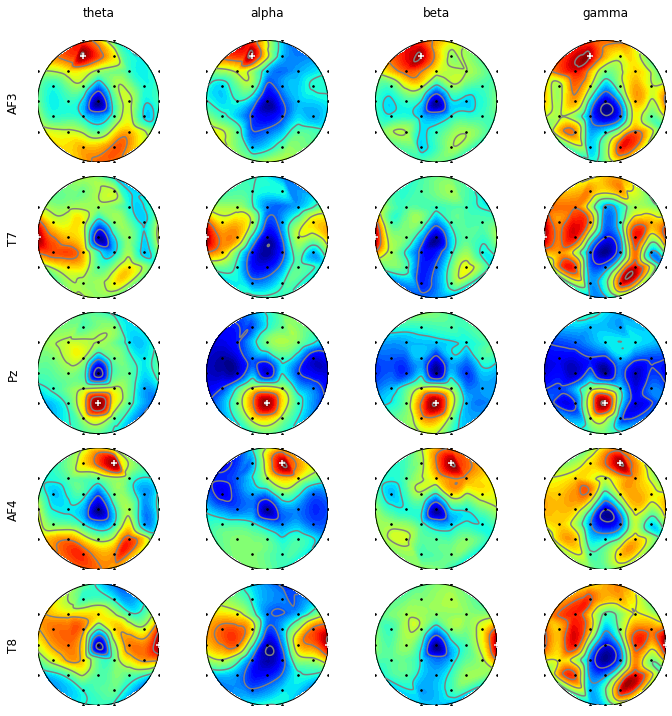

In [194]:
#import matplotlib.image as mpimg

corr = data.corr()
N = 300             # number of points for interpolation
xy_center = [4,4]   # center of the plot
radius = 4         # radius

fig, axs = plt.subplots(5,4)
fig.set_figheight(10)
fig.set_figwidth(10)

channels_names = ['AF3','T7','Pz','AF4','T8']
bands = ['theta', 'alpha', 'beta', 'gamma']
channel = [1,7,15,17,25]

parent = 0
sub = 0

for ax in axs:
    for a in ax:            
        arr = []
        for ch in range(0,32):
            arr.append(corr[f'{channel[parent]}_{bands[sub]}_entropy'][f"{ch}_{bands[sub]}_entropy"])       
        generate_plot(a, arr, channel[parent], bands[sub])
        #img = mpimg.imread(f'{channel[parent]}_{bands[sub]}.png')
        #a.imshow(f)
        
        if parent == 0:
            a.set_title(f"{bands[sub]}",y=1.15)
        if sub == 0:
            a.text(-2, 4,f"{channels_names[parent]}", size=12, verticalalignment='center', rotation=90)                        
        
        sub +=1
    parent += 1
    sub = 0
    
fig.tight_layout()
fig.show()

plt.savefig('correlations_subj1.png')